In [2]:
import numpy as np
import pandas
import linreg
import matplotlib.pyplot as plt
import pylab

# Changing plot sizes
pylab.rcParams['figure.figsize'] = (10, 5)

## Exercise 1a

Number of training instances: 253
Number of test instances: 253
Number of features: 13
Mean of training set: 22.016600790513834
RMSE: 9.672477972746305


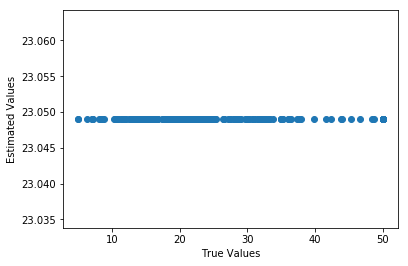

In [3]:
# load data
train_data = np.loadtxt("boston_train.csv", delimiter=",")
test_data = np.loadtxt("boston_test.csv", delimiter=",")
X_train, t_train = train_data[:,:-1], train_data[:,-1]
X_test, t_test = test_data[:,:-1], test_data[:,-1]
# make sure that we have N-dimensional Numpy arrays (ndarray)
t_train = t_train.reshape((len(t_train), 1))
t_test = t_test.reshape((len(t_test), 1))
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of features: %i" % X_train.shape[1])

# (a) compute mean of prices on training set
def meanEst(data):
    return np.full((len(data),1),np.mean(data))

print("Mean of training set: {}".format(meanEst(t_train)[0,0]))

# (b) RMSE function
def rmse(t, tp):
    return np.sqrt(1/len(t)*np.sum(abs(t-tp)**2))

print("RMSE: {}".format(rmse(t_test, meanEst(t_train))))

# (c) visualization of results
plt.scatter(t_test, meanEst(t_test))
plt.xlabel("True Values")
plt.ylabel("Estimated Values")
plt.show()

## Exercise 2a-d

[6.7240e-02 0.0000e+00 3.2400e+00 0.0000e+00 4.6000e-01 6.3330e+00
 1.7200e+01 5.2146e+00 4.0000e+00 4.3000e+02 1.6900e+01 3.7521e+02
 7.3400e+00 2.2600e+01]
22.6
Number of training instances: 253
Number of test instances: 253
Number of features: 13
The two weights w_0 and w_1:
[[23.63506195]
 [-0.43279318]]
The weights w_i:
[[ 3.13886978e+01]
 [-5.96169127e-02]
 [ 2.93672792e-02]
 [-2.90605834e-02]
 [ 2.29256181e+00]
 [-1.73263655e+01]
 [ 3.99375996e+00]
 [ 3.23077761e-03]
 [-1.28724508e+00]
 [ 3.54780191e-01]
 [-1.55819191e-02]
 [-8.14647713e-01]
 [ 1.17820208e-02]
 [-4.64869014e-01]]
RMSE single: 8.954859906611231
RMSE all: 4.6883336536277005


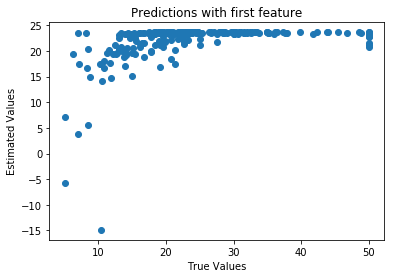

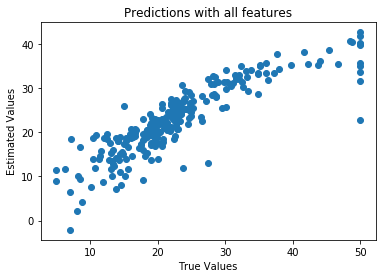

In [9]:
# load data
train_data = np.loadtxt("boston_train.csv", delimiter=",")
test_data = np.loadtxt("boston_test.csv", delimiter=",")
X_train, t_train = train_data[:,:-1], train_data[:,-1]
print(train_data[0,:])
print(train_data[0,-1])
X_test, t_test = test_data[:,:-1], test_data[:,-1]
# make sure that we have N-dimensional Numpy arrays (ndarray)
t_train = t_train.reshape((len(t_train), 1))
t_test = t_test.reshape((len(t_test), 1))
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of features: %i" % X_train.shape[1])

# (a) fit linear regression using only the first feature
model_single = linreg.LinearRegression()
model_single.fit(X_train[:,0], t_train)
print("The two weights w_0 and w_1:\n{}".format(model_single.w))

# (b) fit linear regression model using all features
model_all = linreg.LinearRegression()
model_all.fit(X_train, t_train)
print("The weights w_i:\n{}".format(model_all.w))

# (c) evaluation of results
predict_single = model_single.predict(X_test[:,0])
predict_all = model_all.predict(X_test)

print("RMSE single: {}".format(rmse(predict_single, t_test)))
print("RMSE all: {}".format(rmse(predict_all, t_test)))

# Insidious Plotting
plt.scatter(t_test[:,0], predict_single)
plt.title('Predictions with first feature')
plt.xlabel("True Values")
plt.ylabel("Estimated Values")
plt.show()

plt.scatter(t_test, predict_all)
plt.title('Predictions with all features')
plt.xlabel("True Values")
plt.ylabel("Estimated Values")
plt.show()